# Pymaceuticals Inc.
---

### Analysis

- Squamous Cell Carcinoma (SCC) Study
- The data provided for this study includes 1893 timepoints for 249 mice.
- The sex of the mice was evenly split 50.2% male and 49.5%.
- The four primary treatments of interest were Capomulin, Ramicane, Infubinol, and Ceftamin.
- Capomulin and Ramiane appear to be more effective than Infubinol, and Ceftamin.
 

In [413]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [534]:
# Checking the number of mice.
number_of_mice = len(mouse_data['Mouse ID'].unique())
number_of_mice

249

In [417]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [419]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = mouse_data.loc[mouse_data["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [421]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = mouse_data[mouse_data["Mouse ID"] != "g989"]
clean_dataframe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [423]:
clean_dataframe.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [425]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_dataframe['Mouse ID'].value_counts()
clean_mice_number = len(clean_mice)
clean_mice_number

248

## Summary Statistics

In [427]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_by_drug = clean_dataframe.groupby("Drug Regimen")

drug_regimen_mean = grouped_by_drug["Tumor Volume (mm3)"].mean()
drug_regimen_median = grouped_by_drug["Tumor Volume (mm3)"].median()
drug_regimen_variance = grouped_by_drug["Tumor Volume (mm3)"].var()
drug_regimen_standard_deviation = grouped_by_drug["Tumor Volume (mm3)"].std()
drug_regimen_sem = grouped_by_drug["Tumor Volume (mm3)"].sem()

# Assembling the resulting series into a single summary dataframe.

summary_statistics_dataframe = pd.DataFrame({"Mean Tumor Volume": drug_regimen_mean, 
                                    "Median Tumor Volume":drug_regimen_median, 
                                    "Tumor Volume Variance":drug_regimen_variance, 
                                    "Tumor Volume Std. Dev.": drug_regimen_standard_deviation, 
                                    "Tumor Volume Std. Err.": drug_regimen_sem})

summary_statistics_dataframe

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [429]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_dataframe.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

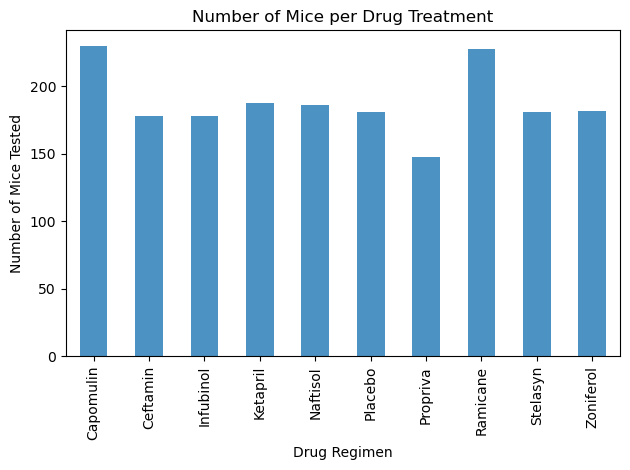

In [509]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = grouped_by_drug["Mouse ID"].count()
bar_chart = mice_count.plot.bar(alpha=0.8, align='center')  

# Axis Display
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Drug Treatment")

plt.savefig("pandas_bar_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()


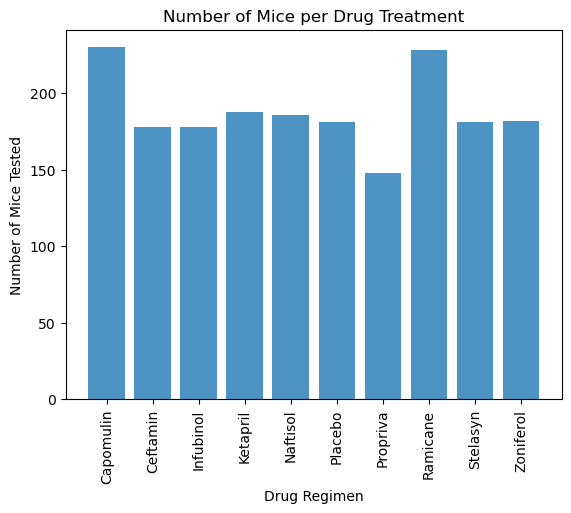

In [505]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Creating a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, alpha=0.8, align='center')

# Setting the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Drug Treatment")
plt.savefig("pyplot_bar_mice_per_treat.png", bbox_inches = "tight")

plt.show()

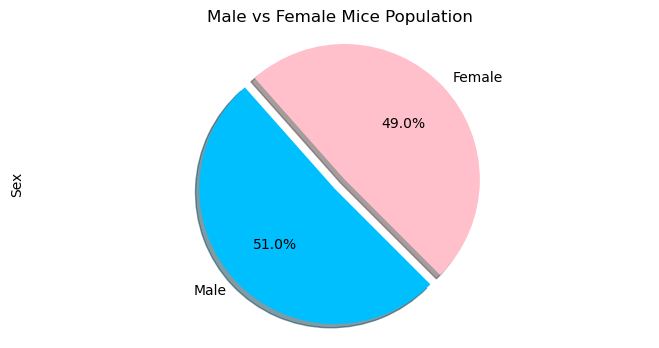

In [517]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
grouped_by_sex = clean_dataframe.groupby("Sex")
sex_data = grouped_by_sex["Sex"].count()

colors = ["pink", "deepskyblue"]
explode = (0.1, 0)
pandas_pie = sex_data.plot(kind="pie", figsize=(8,4), colors=colors, y="Total Count", title="Male vs Female Mice Population",
                              startangle=315, explode=explode, shadow=True, autopct="%1.1f%%")
plt.axis("equal")
plt.savefig("pandas_pie_male_vs_female.png", bbox_inches = "tight")
plt.show()

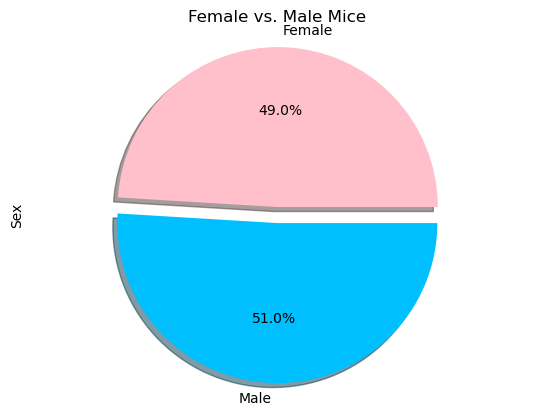

In [519]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ['Female', 'Male']
sizes = [grouped_by_sex]

plot = sex_data.plot.pie(y='Total Count', autopct="%1.1f%%", colors = ["pink", "deepskyblue"],explode = (0.1,0), shadow=True)
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")

plt.axis("equal")
plt.savefig("pyplot_pie_male_vs_female.png", bbox_inches = "tight")
plt.show()


## Quartiles, Outliers and Boxplots

In [481]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

timepoint_merged = last_timepoint.merge(mouse_data, on=["Mouse ID", "Timepoint"], how="left")


In [492]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = timepoint_merged.loc[timepoint_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    final_tumor_vol.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    #print(f"For {drug}, the outliers are: {outliers}")
    print(f"{drug}'s outliers:{outliers}")

Capomulin's outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


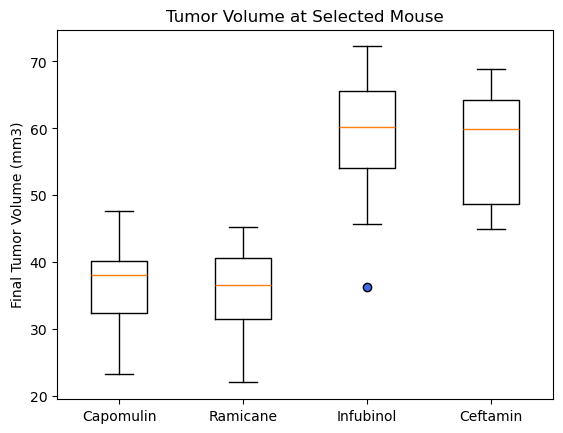

In [521]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group
blue_point = dict(markerfacecolor = "royalblue", markersize=6)

plt.boxplot([capomulin, ramicane, infubinol, ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= blue_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')

plt.savefig("pyplot_boxplot_final_tumor_vol.png", bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

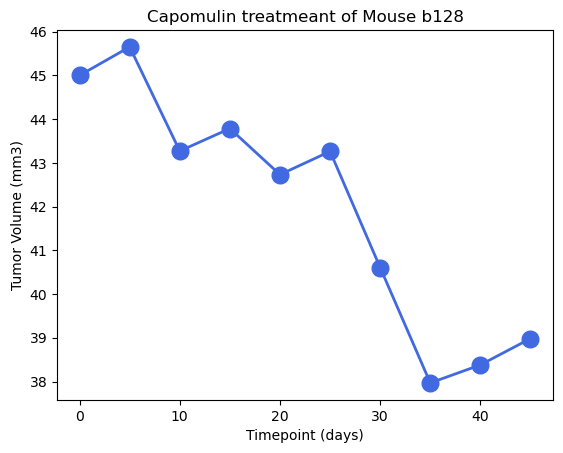

In [523]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == "Capomulin",:]

mice_on_capomulin = capomulin_mice["Mouse ID"].unique()

line_df = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "b128",:]

x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of Mouse b128')
plt.plot(x_axis, tumor_size, linewidth=2, color="royalblue", markersize=12,marker="o")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig("mouse_Capomulin_line_plot.png", bbox_inches = "tight")
plt.show()

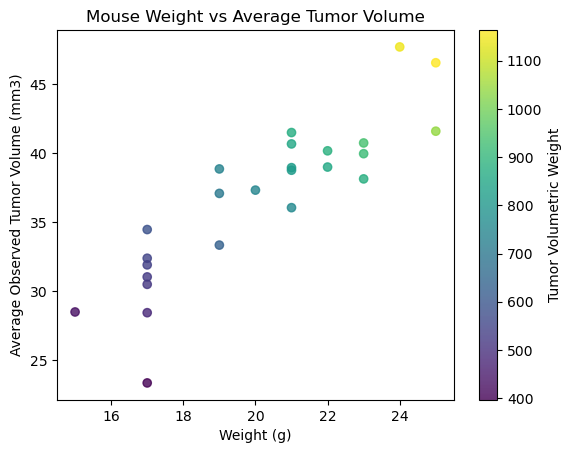

<Figure size 640x480 with 0 Axes>

In [530]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = timepoint_merged.loc[timepoint_merged["Drug Regimen"] == "Capomulin"].copy()

# Create new column that will multiply tumor volume and weight
capomulin_data["Volumetric Weight"] = capomulin_data["Tumor Volume (mm3)"] * capomulin_data["Weight (g)"]

plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], marker="o", alpha=0.8, c=capomulin_data["Volumetric Weight"])
clb = plt.colorbar()
clb.set_label("Tumor Volumetric Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.savefig("avg_tumor_vol_scatterplot.png", bbox_inches = "tight")
plt.show()

plt.savefig("avg_tumor_vol_scatterplot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88.


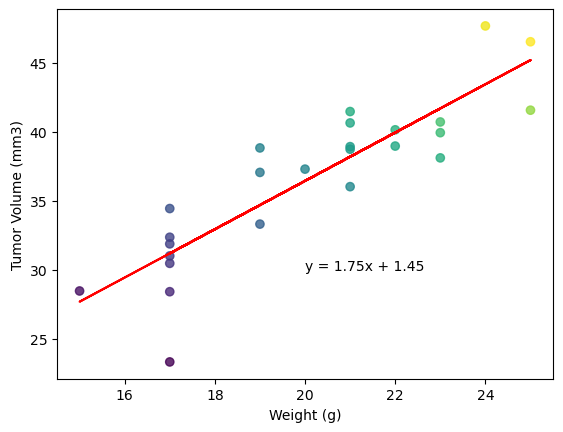

In [527]:
# Calculate the correlation coefficient and a linear regression model
correlation_coefficient = st.pearsonr(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}.")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"])
regress_values = capomulin_data["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_data["Weight (g)"], capomulin_data["Tumor Volume (mm3)"], marker="o", alpha=0.8, c=capomulin_data["Volumetric Weight"])
plt.plot(capomulin_data["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("corr_avg_tumor_vol_and_weight_scatterplot.png", bbox_inches = "tight")
plt.show()